In [ ]:

import numpy as np                  
import pandas as pd                

import matplotlib.pyplot as plt     


import seaborn as sns               

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print('Dataset shape:',titanic.shape)

Dataset shape: (891, 15)


In [5]:
print("missing values in each column:",titanic.isnull().sum())

missing values in each column: survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
titanic['age']=titanic["age"].fillna(titanic['age'].mean())

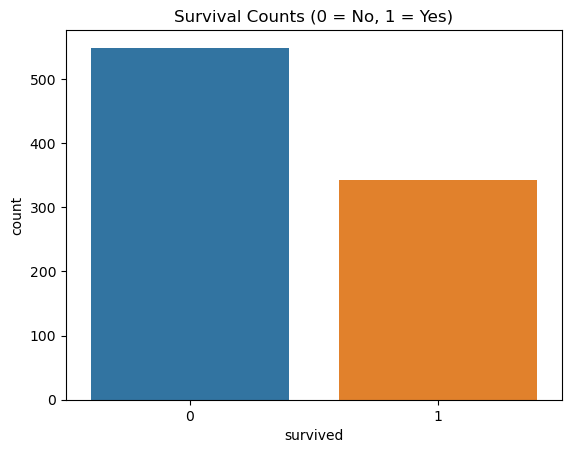

In [8]:
sns.countplot(data=titanic, x='survived')
plt.title('Survival Counts (0 = No, 1 = Yes)')
plt.show()


In [9]:
df = titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]

df = df.dropna()
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)

df.head()


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [17]:
x = df.drop('survived', axis=1)
y = df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\arjb0\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)[:,1]
print('Predictions:', y_pred[:10])
print('Prediction Probabilities:', y_pred_prob[:10])

Accuracy: 0.7808988764044944
Predictions: [0 1 1 0 1 0 0 0 1 1]
Prediction Probabilities: [0.10302737 0.95679834 0.75758079 0.24668041 0.96175355 0.10709729
 0.290538   0.13591521 0.91732827 0.96114136]


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print('✅ Accuracy:', accuracy)

print('\n📊 Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n📑 Classification Report:')
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.7808988764044944

📊 Confusion Matrix:
[[85 24]
 [15 54]]

📑 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



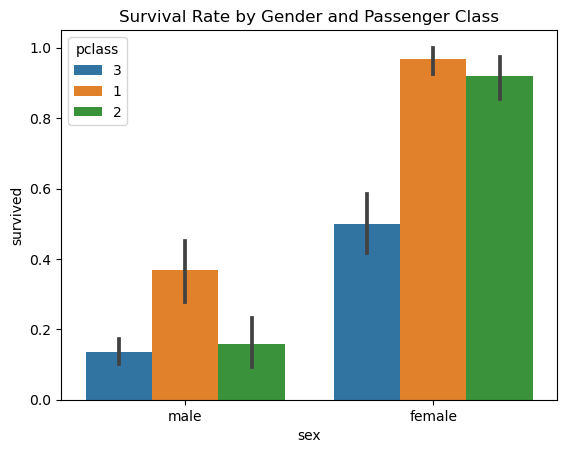

In [25]:
sns.barplot(
    x='sex', 
    y='survived', 
    hue=titanic['pclass'].astype(str), 
    data=titanic
)

plt.title('Survival Rate by Gender and Passenger Class')
plt.show()
